In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [ ]:
data = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
           'IsActiveMember', 'EstimatedSalary', 'Exited']

for col in columns:
    print(col, data[col].nunique())


CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


# 1. Data Exploration:
## 1.1 Data Description:

- **Customer ID:** A unique identifier for each customer
- **Surname:** The customer's surname or last name
- **Credit Score:** A numerical value representing the customer's credit score
- **Geography:** The country where the customer resides
- **Gender:** The customer's gender
- **Age:** The customer's age.
- **Tenure:** The number of years the customer has been with the bank
- **Balance:** The customer's account balance
- **NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)
- **HasCrCard:** Whether the customer has a credit card
- **IsActiveMember:** Whether the customer is an active member
- **EstimatedSalary:** The estimated salary of the customer
- **Exited:** Whether the customer has churned (Target Variable)

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Count of each category in the 'Exited' column
target_variable_counts = data['Exited'].value_counts()

# Display the counts
print("Distribution of Target Variable (Exited):")
print(target_variable_counts)



Distribution of Target Variable (Exited):
Exited
0    7963
1    2037
Name: count, dtype: int64


  ## Some observations
- We can see that data is highly imbalanced. Almost **80%** of our data is from class 0 (not exited) and **20%** data is from class 1 (exited).
- In a real life also we only care about the persons or the people who are quitting or leaving `(Exited)` the bank and we only want to analyse the patterns of those people.

In [ ]:
# Unique value counts for each column
unique_counts = data.nunique()

# Threshold to distinguish continuous and categorical
threshold = 12

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

# Removing the 'Exited' from categorical since it's our target variable
if 'Exited' in categorical_vars:
    categorical_vars.remove('Exited')
# Removing 'RowNumber' and 'CustomerId' from continuous since they are identifiers
if 'RowNumber' in continuous_vars:
    continuous_vars.remove('RowNumber')
if 'CustomerId' in continuous_vars:
    continuous_vars.remove('CustomerId')
if 'Surname' in continuous_vars:
    continuous_vars.remove('Surname')


print(f"Categorical Variables: {categorical_vars}")
print(f"Continuous/Numerical Variables: {continuous_vars}")


Categorical Variables: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Continuous/Numerical Variables: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


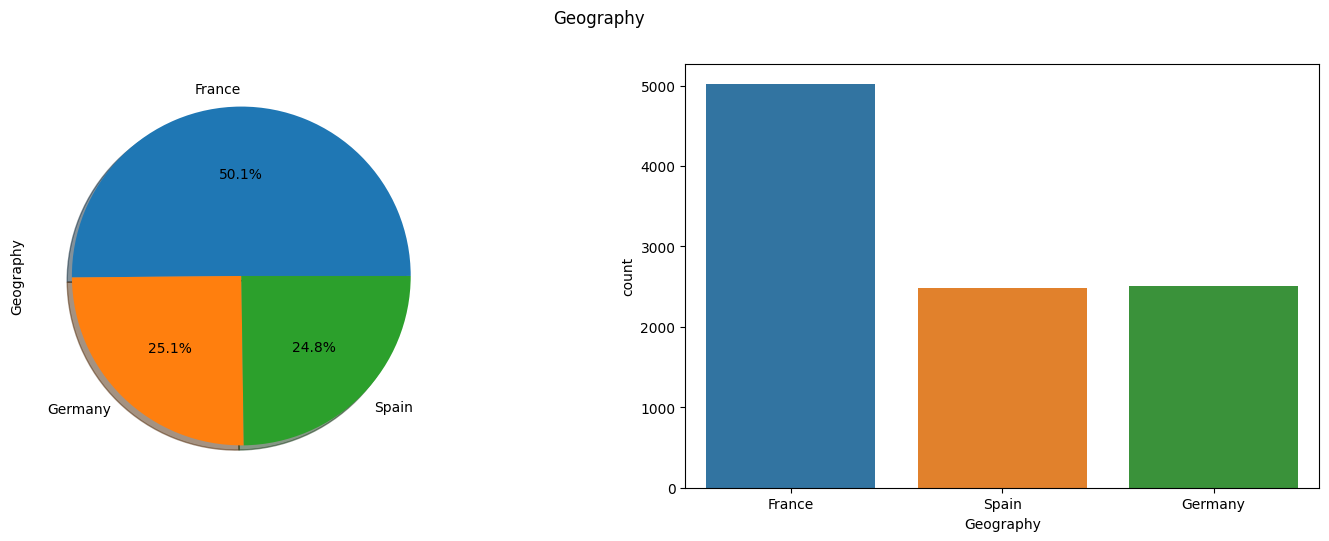

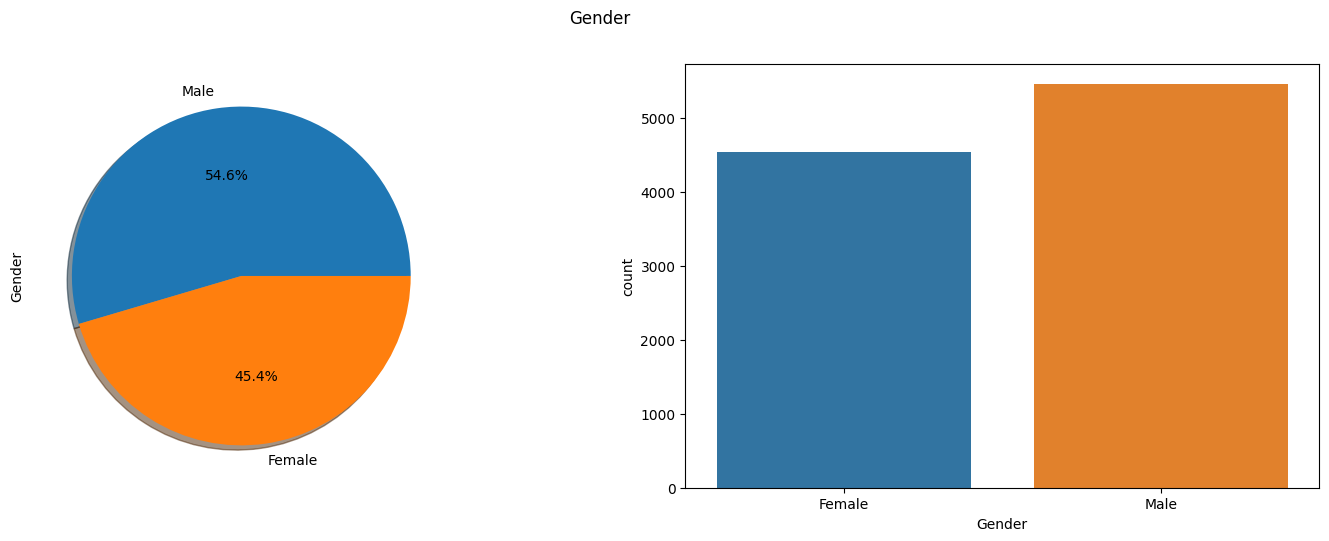

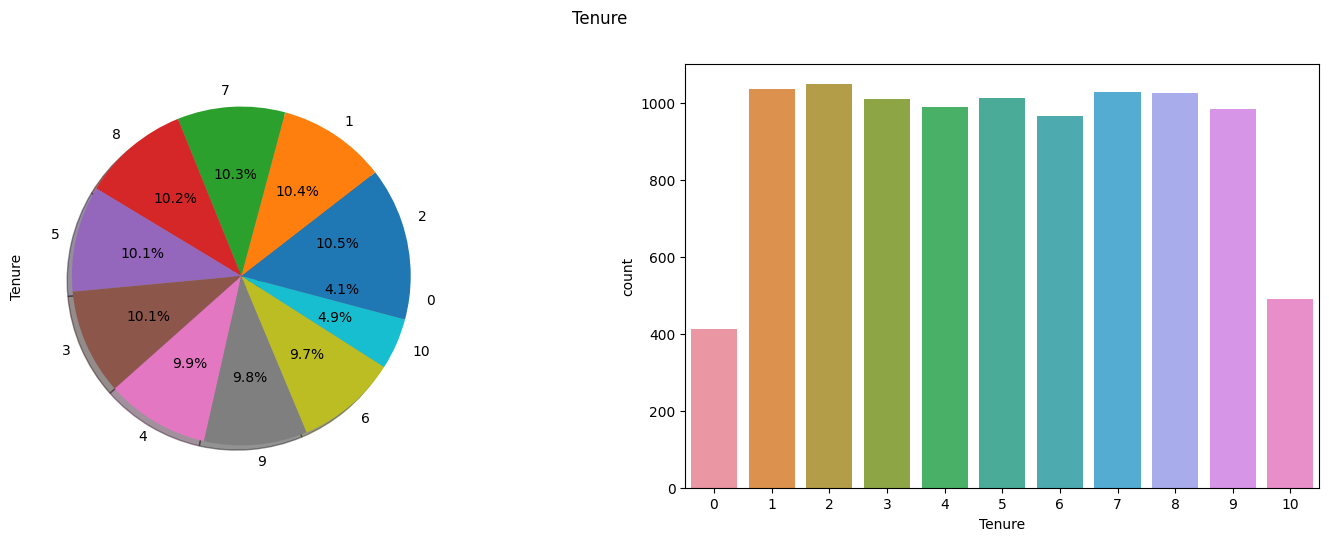

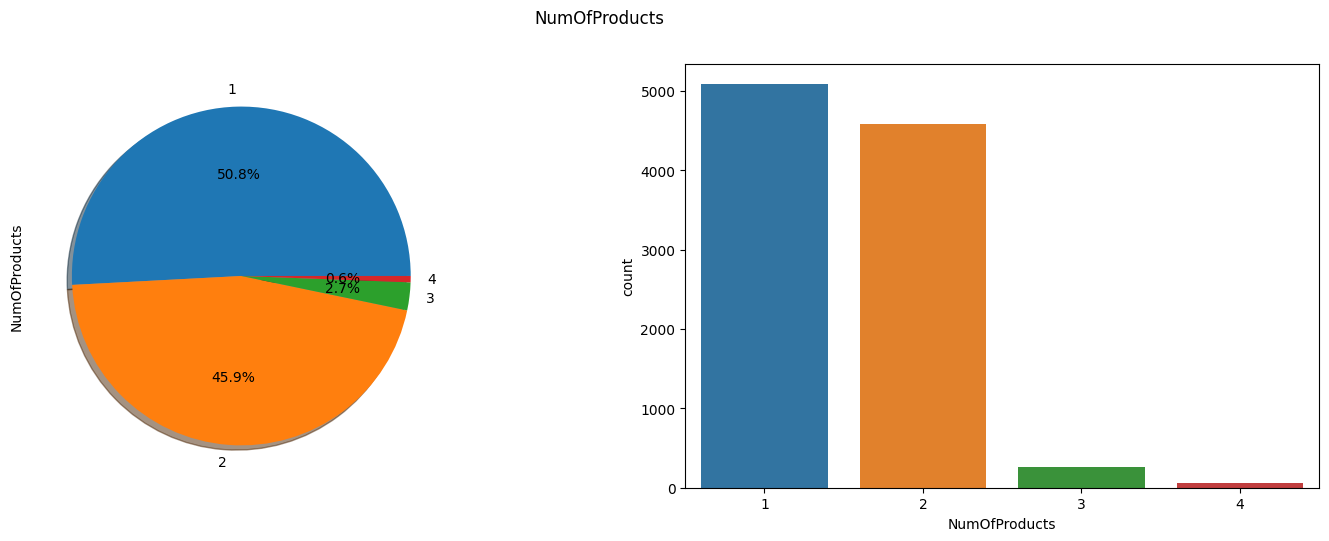

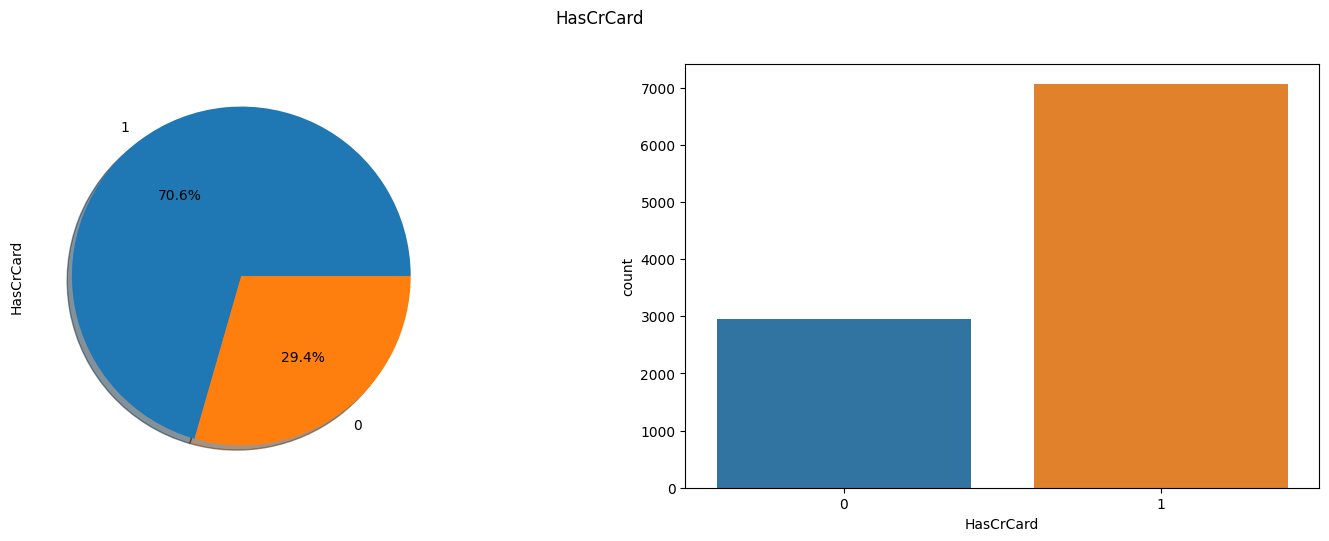

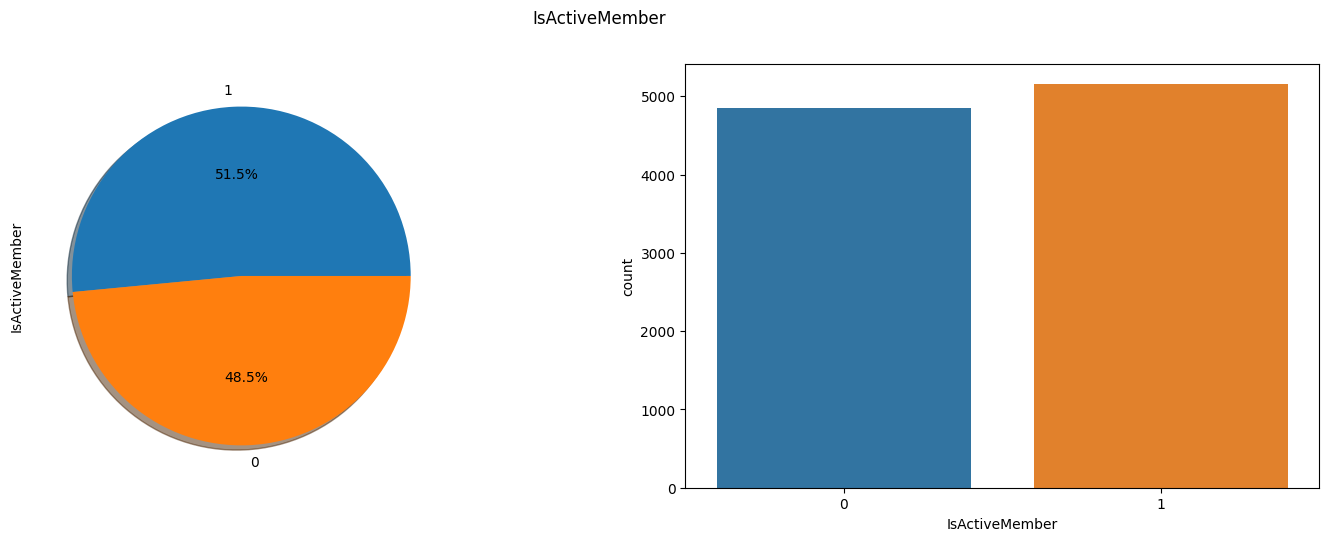

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=data,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

### Some Observations from above plots:

- Some of the variables like `IsActiveMember`, `Tenure` and `Gender` are almost equaly distributed while the other variables like `HasCrCard`, `NumOfProducts`, and `Gender` are not equaly distributed.
- At first `Tenure` seems like continuous variable but it is a categorical variable with 11 classes from 0 to 10.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

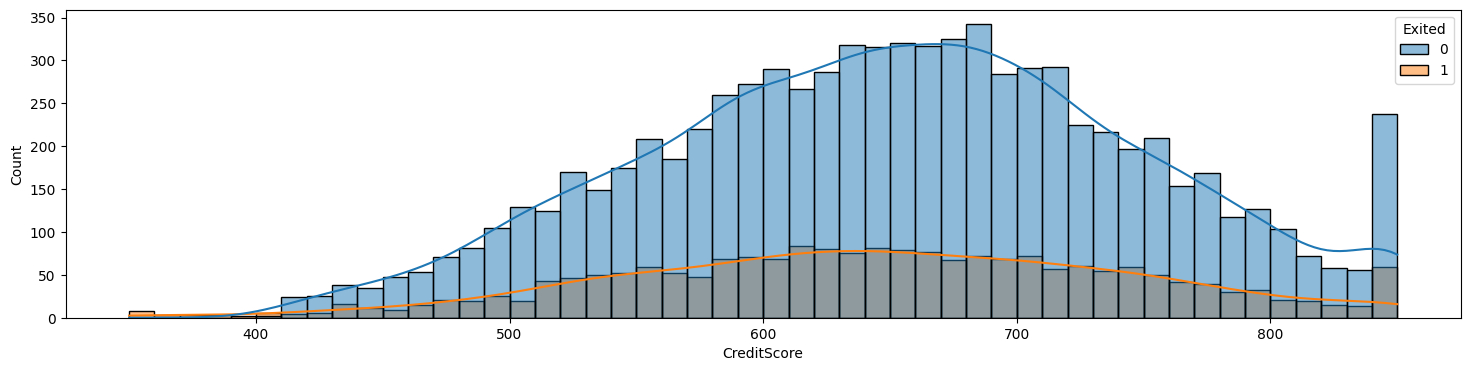

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

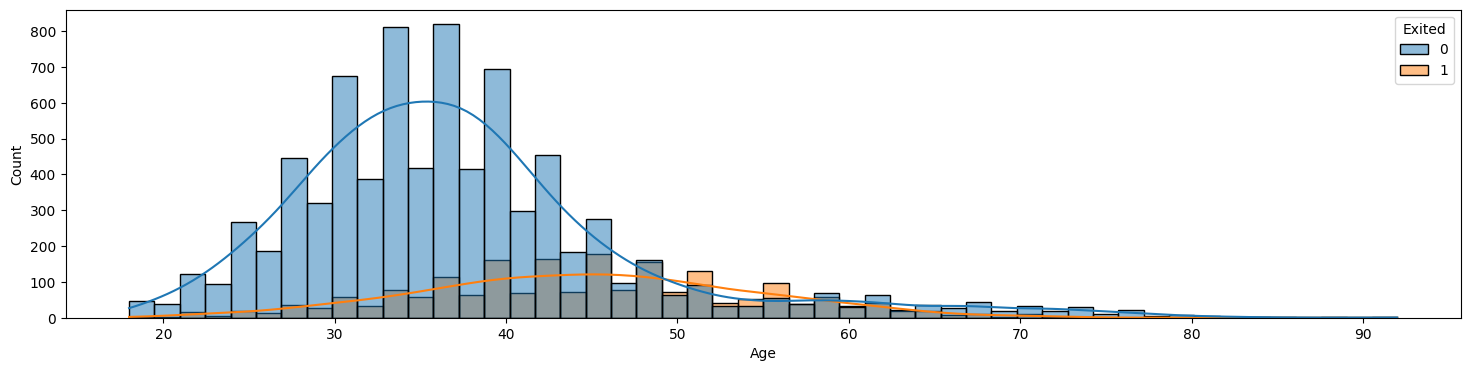

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


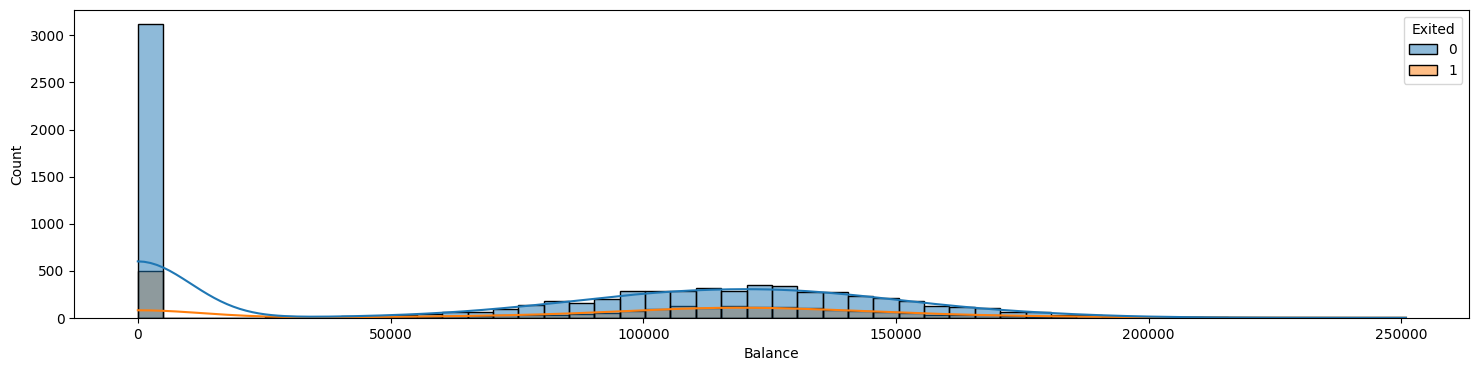

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


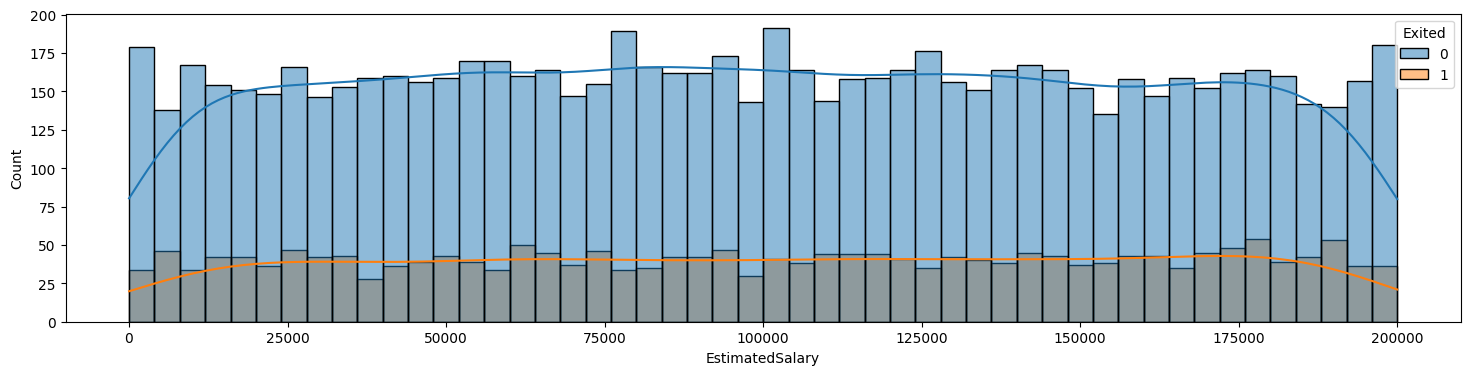

In [ ]:
#continuous_vars.remove('Surname')

for column in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=data, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

### Some Observations from above plots:

- Majority of the data from `balance` variable is 0 only which makes the distribution skewed to 0 side.
- Other variables also show the skewness in the distributions.
- Distribution of data for both classes is almost same for all the variables.

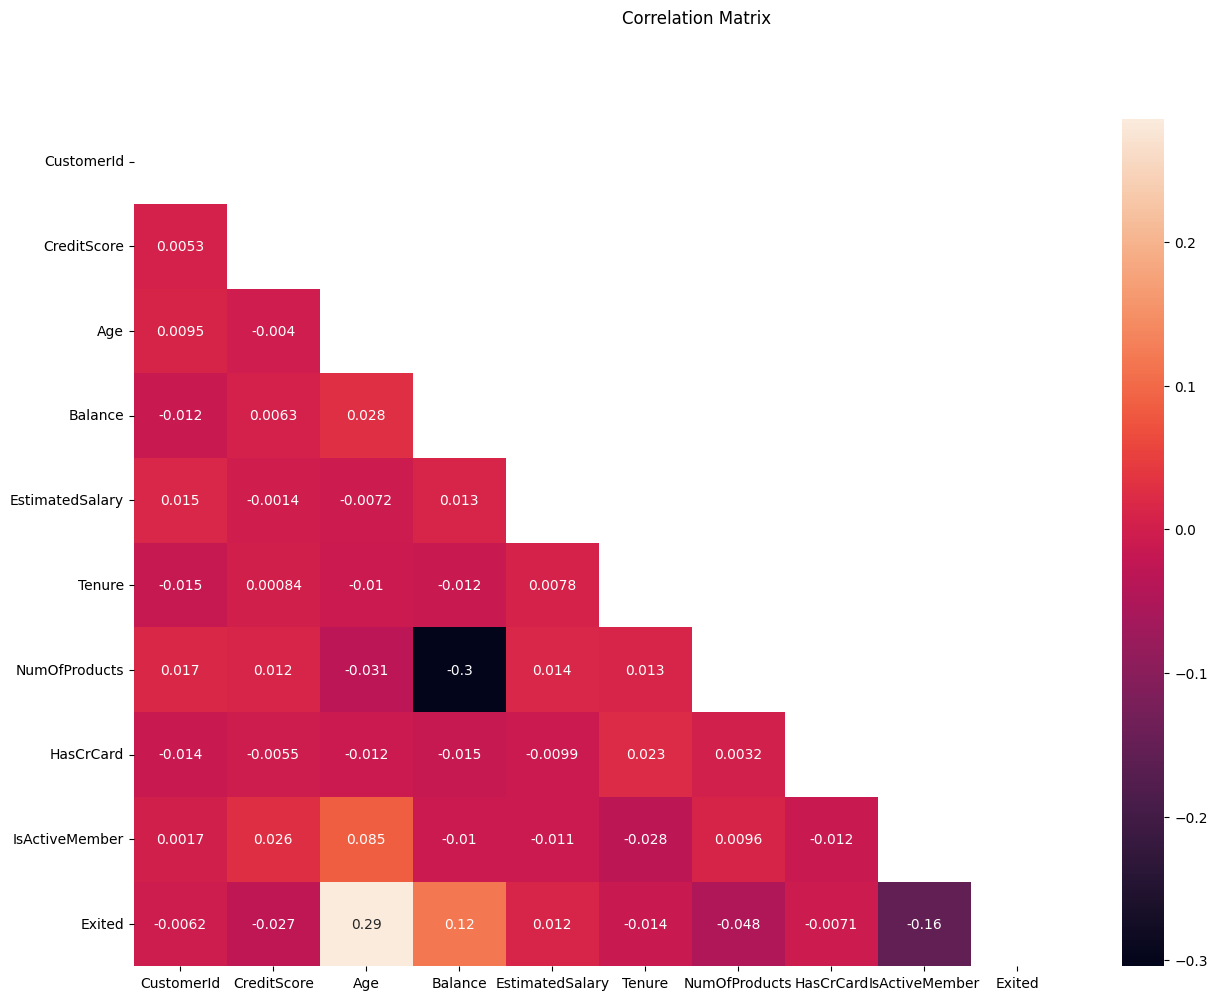

                 CustomerId  CreditScore       Age   Balance  EstimatedSalary  \
CustomerId         1.000000     0.005308  0.009497 -0.012419         0.015271   
CreditScore        0.005308     1.000000 -0.003965  0.006268        -0.001384   
Age                0.009497    -0.003965  1.000000  0.028308        -0.007201   
Balance           -0.012419     0.006268  0.028308  1.000000         0.012797   
EstimatedSalary    0.015271    -0.001384 -0.007201  0.012797         1.000000   
Tenure            -0.014883     0.000842 -0.009997 -0.012254         0.007784   
NumOfProducts      0.016972     0.012238 -0.030680 -0.304180         0.014204   
HasCrCard         -0.014025    -0.005458 -0.011721 -0.014858        -0.009933   
IsActiveMember     0.001665     0.025651  0.085472 -0.010084        -0.011421   
Exited            -0.006248    -0.027094  0.285323  0.118533         0.012097   

                   Tenure  NumOfProducts  HasCrCard  IsActiveMember    Exited  
CustomerId      -0.014883   

In [ ]:
df4 = data[['CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary',
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()
print(corr_matrix)

## 2.6 Correlation Analysis:

Correlation is the statistical analysis of the relationship or dependency between two variables. Correlation allows us to study both the strength and direction of the relationship between two sets of variables.

There are mainly 3 types of Correlations:

- Positive Correlation: Two variables are said to be positively correlated when their values move in the same direction.
- Neutral Correlation: No relationship in the change of variables X and Y. In this case, the values are completely random and do not show any sign of correlation.
- Negative Correlation: Finally, variables X and Y will be negatively correlated when their values change in opposite directions.

## 3. Modelling

In [ ]:
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

## 3.3 Encoding Caegorical Variables:

There are multiple encoders available but 2 of them are very famous.

**1. Label Encoder:**
- Label Encoding is a popular encoding technique for handling categorical variables. A unique integer or alphabetical ordering represents each label.
- Problems with Label Encoder: Although if our Categorical Data has no order in it the `LabelEncoder` will assign the integer according to the alphabetical ordering and because of that.

**2. One Hot Encoder:**
- One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables.


In [ ]:
X_encoded = pd.get_dummies(X, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])

X_encoded.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0,IsActiveMember_1,HasCrCard_0,HasCrCard_1,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2,0.00,101348.88,True,False,False,True,False,False,True,False,True,True,False,False,False
1,608,41,1,83807.86,112542.58,False,False,True,True,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,113931.57,True,False,False,True,False,True,False,False,True,False,False,True,False
3,699,39,1,0.00,93826.63,True,False,False,True,False,True,False,True,False,False,True,False,False
4,850,43,2,125510.82,79084.10,False,False,True,True,False,False,True,False,True,True,False,False,False


In [ ]:
!pip install -U imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score



# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# SVM Model with SMOTE
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.769

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1607
           1       0.45      0.77      0.57       393

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.77      0.79      2000



ROC-AUC Score: 0.8372530484473939


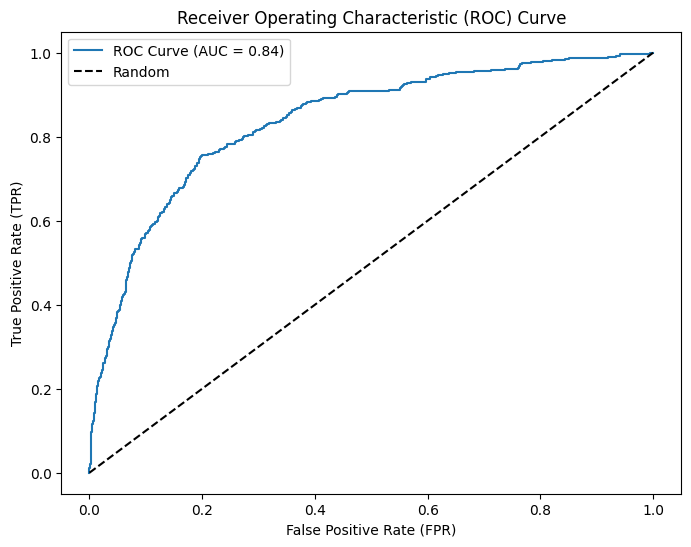

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob = svm_model.decision_function(X_test_scaled)

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Model Evaluation
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Model:
Accuracy: 0.771

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1607
           1       0.45      0.77      0.57       393

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.77      0.79      2000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Model Evaluation
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model:
Accuracy: 0.8355

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1607
           1       0.58      0.61      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}

# Instantiate the Random Forest model
rf_model_tuned = RandomForestClassifier(class_weight='balanced', random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


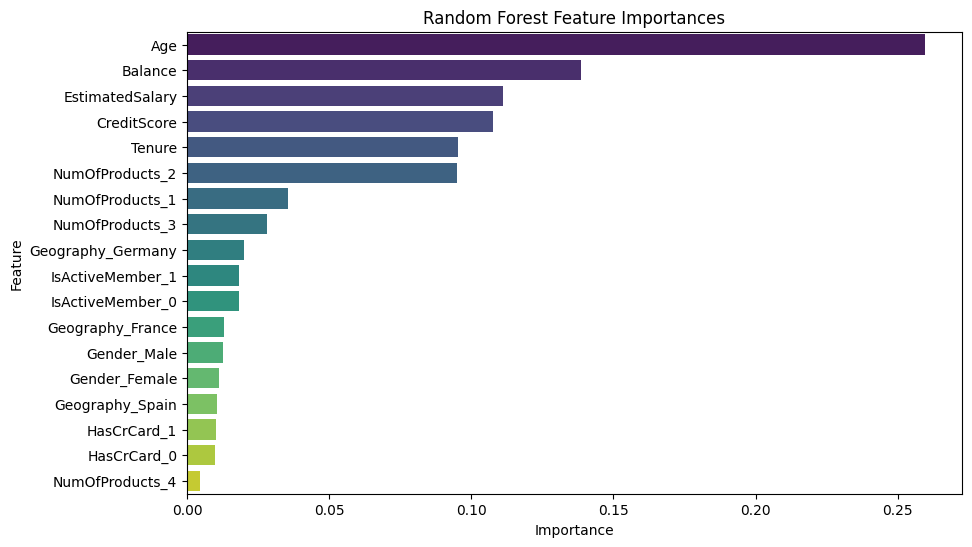

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.show()


In [ ]:
rf_model_tuned.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model_tuned.predict(X_test_scaled)

# Model Evaluation
print("Random Forest Model tuned:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model tuned:
Accuracy: 0.8355

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1607
           1       0.58      0.61      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [ ]:
# Select the top N important features
top_n_features = 10  # You can adjust this number based on the importance scores

# Get the indices of the top N features
top_feature_indices = np.argsort(feature_importances)[-top_n_features:]

# Select only the relevant features from the training and test sets
X_train_top_features = X_train_resampled[:, top_feature_indices]
X_test_top_features = X_test_scaled[:, top_feature_indices]

# Instantiate the Random Forest model with the best-tuned hyperparameters
rf_model_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

# Train the Random Forest model with the top features
rf_model_tuned.fit(X_train_top_features, y_train_resampled)

# Predictions
y_pred_rf_tuned_top_features = rf_model_tuned.predict(X_test_top_features)

# Model Evaluation
print("Random Forest Model Tuned with Top Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned_top_features))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned_top_features))


Random Forest Model Tuned with Top Features:
Accuracy: 0.832

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      1607
           1       0.57      0.61      0.59       393

    accuracy                           0.83      2000
   macro avg       0.74      0.75      0.74      2000
weighted avg       0.84      0.83      0.83      2000



# What else to consider?

* add cross-fold cross-validation
*  add more features using feature engineering
*deal with outliners
* Try with More models
*Lastly will add advance techniques like stacking ,ensemble models